#### The XOR problem and the perceptron

A single perceptron can be used to solve the XOR problem. The inability of the perceptron to solve the XOR is due to the fact that a single the perceptron is only capable of classifying linearly separable data and the XOR problem is not.

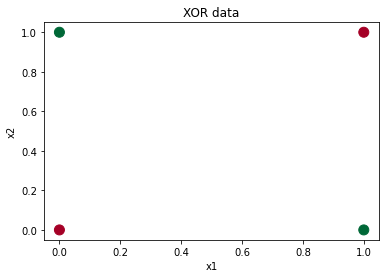

In [1]:
#Create a matrix for the XOR problem
import numpy as np
xor_data = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

#plot the data
import matplotlib.pyplot as plt
plt.scatter(xor_data[:,0],xor_data[:,1],s=100,c=xor_data[:,2],marker='o',cmap=plt.cm.RdYlGn);

# set axis labels
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR data')
plt.show()


In [62]:
# Print xor data as a pandas dataframe
import pandas as pd
xor_df = pd.DataFrame(xor_data, columns=['x1','x2','y'])
xor_df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
import numpy as np
class PerceptronNonTrainable:
    def __init__(self, w, b):
        self.w = np.array(w, dtype=np.float64)
        self.b = np.float64(b)
     
    # This is a vectorized operation over a matrix
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    # This is also a vectorized operation over a matrix
    def net_input(self, X):
        return np.dot(X, self.w) + self.b    

    def __call__(self, X):
        return self.predict(X)    

### Multi layer perceptron network architecture
![Image that shows the network architecture](img/xor_mlp.png "XOR network architecture")
<style type="text/css">
    img {
        width: 450px;
    }
</style>

In [24]:
or_perceptron =  PerceptronNonTrainable([1,1], -0.5)
and_perceptron = PerceptronNonTrainable([1,1], -1.5)
out_perceptron = PerceptronNonTrainable([1,-1],-0.5)

def xor_multilayer_perceptron(X):
    layer0_out = np.column_stack((or_perceptron(X),and_perceptron(X)))
    return out_perceptron(layer0_out)
    

#### Verifying the correctness of the XOR multilayer perceptron

In [26]:
xor_multilayer_perceptron(xor_data[:,0:2]) == xor_data[:,2]

array([ True,  True,  True,  True])

### Tensorflow implementation of the XOR multilayer perceptron

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    Dense(4, input_shape=(2,), activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
history = model.fit(xor_data[:,0:2], xor_data[:,2], epochs=3000)

Epoch 1/3000
1/1 [==============================] - 0s 318ms/step - loss: 0.6968 - accuracy: 0.2500
Epoch 2/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.2500
Epoch 3/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.2500
Epoch 4/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.2500
Epoch 5/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 11/3000
1/1

In [55]:
y_probas = model.predict(xor_data[:,0:2])
y_pred = (y_probas > 0.5).astype(int)
y_pred.reshape(4) == xor_data[:,2]

1/1 [==============================] - 0s 32ms/step


array([ True,  True,  True,  True])

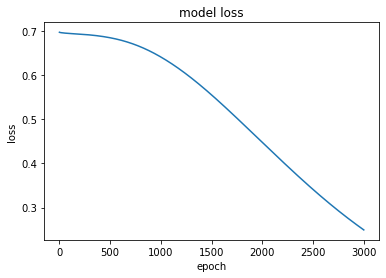

In [59]:
#Plot the loss and accuracy curves for training
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

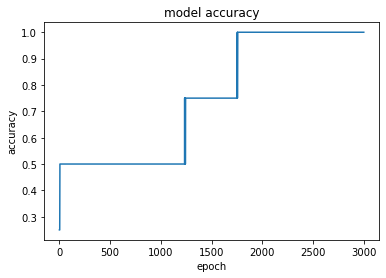

In [60]:
# Plot the accuracy curve for training
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

704/704 [==============================] - 1s 826us/step


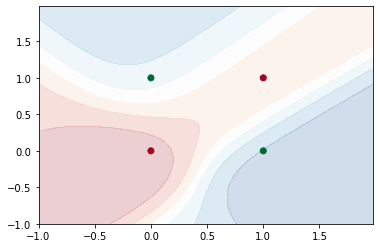

In [61]:
#Plot the decision boundary for the XOR problem
import matplotlib.pyplot as plt
x1_min, x1_max = xor_data[:,0].min() - 1, xor_data[:,0].max() + 1
x2_min, x2_max = xor_data[:,1].min() - 1, xor_data[:,1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, .02), np.arange(x2_min, x2_max, .02))
grid = np.c_[xx1.ravel(), xx2.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.RdBu, alpha=0.2)
plt.scatter(xor_data[:,0], xor_data[:,1], c=xor_data[:,2], cmap=plt.cm.RdYlGn)
plt.show()